In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

In [2]:
def sub_plots(data_0, data_1, data_2, data_3, data_4, data_5):

  fig, axes = plt.subplots(nrows=2, ncols=3)

  data_0.plot(x ='SPO', y='heart_rate', kind = 'scatter', ax=axes[0,0],  title='Resting', figsize=(15,10))
  data_1.plot(x ='SPO', y='heart_rate', kind = 'scatter', ax=axes[0,1], title='Walking')
  data_2.plot(x ='SPO', y='heart_rate', kind = 'scatter', ax=axes[0,2], title='Steps')
  data_3.plot(x ='SPO', y='heart_rate', kind = 'scatter', ax=axes[1,0], title='Plank')
  data_4.plot(x ='SPO', y='heart_rate', kind = 'scatter', ax=axes[1,1],  title='MC')
  data_5.plot(x ='SPO', y='heart_rate', kind = 'scatter', ax=axes[1,2], title='Squats')
  plt.show()

In [3]:
def get_datasets(path_v, path_a):

    path = os.getcwd()
    v_files = os.path.join(path,path_v)
    a_files = os.path.join(path,path_a) 

    paths, dirs, files_v = next(os.walk(v_files))
    paths, dirs, files_a = next(os.walk(a_files))
    file_v_count = len(files_v)
    file_a_count = len(files_a)

    df_v_list = []
    df_a_list = []

    for i in range(file_v_count):
        temp_df = pd.read_csv(os.path.join(path_v,files_v[i]),sep = ';')
        df_v_list.append(temp_df)

    #for dataset in df_v_list:
    #    print("vital: ", len(dataset))
        
    for i in range(file_a_count):
        temp_df = pd.read_csv(os.path.join(path_a,files_a[i]),sep = ';')
        df_a_list.append(temp_df)

    #for dataset in df_a_list:
        #print("acc: ", len(dataset))
        
    return df_v_list, df_a_list

In [4]:
# Get n first rows of a fiven file
# Remove negative values for mean
def get_head_dataset(df_v_list, df_a_list, min, n):
    df_v_list_new= df_v_list.copy()
    df_a_list_new= df_a_list.copy()

    for i in range(len(df_v_list_new)):
        #df_v_list_new[i] = df_v_list_new[i].sample(n=min, random_state=1).reset_index(drop=True)
        df_v_list_new[i].loc[df_v_list_new[i]['SPO'] < 0, 'SPO'] = df_v_list_new[i].loc[df_v_list_new[i]['SPO'] > 0, 'SPO'].mean()
        df_v_list_new[i] = df_v_list_new[i].head(min)

    for i in range(len(df_a_list_new)):
        df_a_list_new[i] = df_a_list_new[i].head(n)
    return df_v_list_new, df_a_list_new

In [5]:
# Concat all csv files for the same exercise
def concat_datsets(df_v_list_new, df_a_list_new):
    data_set_v = []
    data_set_a = []
    for i in range(len(df_v_list_new)):
        data_set_v.append(df_v_list_new[i])

    for i in range(len(df_a_list_new)):
        data_set_a.append(df_a_list_new[i])

    data_set_v = pd.concat(data_set_v, axis=0)
    data_set_a = pd.concat(data_set_a, axis=0)
    
    #data_set_v[['person_id', 'exercise']] = data_set_v[['person_id', 'exercise']].astype(int)
    return data_set_v, data_set_a

In [6]:
# Get first n rows for acceleration files in order to match with the size of vital files
def get_head_dataset_a(df_a_list, n):
    df_a_list_new= df_a_list.copy()
    df_a_list_new = df_a_list_new.head(n)
    return df_a_list_new

In [7]:
# Rows to take for each vital file
min=1000
# Rows to take for each acc file
n= 3500

path_v_0 = '0-Baseline/vitals'
path_a_0 = '0-Baseline/acc'

df_v_list_0, df_a_list_0 = get_datasets(path_v_0, path_a_0)
df_v_list_new_0, df_a_list_new_0 = get_head_dataset(df_v_list_0, df_a_list_0, min,n)
data_set_v_0, data_set_a_0 = concat_datsets(df_v_list_new_0, df_a_list_new_0)

path_v_1 = '1-Walking/vitals'
path_a_1 = '1-Walking/acc'

df_v_list_1, df_a_list_1 = get_datasets(path_v_1, path_a_1)
df_v_list_new_1, df_a_list_new_1 = get_head_dataset(df_v_list_1, df_a_list_1, min,n)
data_set_v_1, data_set_a_1 = concat_datsets(df_v_list_new_1, df_a_list_new_1)

path_v_2 = '2-Steps/vitals'
path_a_2 = '2-Steps/acc'

df_v_list_2, df_a_list_2 = get_datasets(path_v_2, path_a_2)
df_v_list_new_2, df_a_list_new_2 = get_head_dataset(df_v_list_2, df_a_list_2, min,n)
data_set_v_2, data_set_a_2 = concat_datsets(df_v_list_new_2, df_a_list_new_2)

path_v_3 = '3-Plank/vitals'
path_a_3 = '3-Plank/acc'

df_v_list_3, df_a_list_3 = get_datasets(path_v_3, path_a_3)
df_v_list_new_3, df_a_list_new_3 = get_head_dataset(df_v_list_3, df_a_list_3, min,n)
data_set_v_3, data_set_a_3 = concat_datsets(df_v_list_new_3, df_a_list_new_3)

path_v_4 = '4-MC/vitals'
path_a_4 = '4-MC/acc'

df_v_list_4, df_a_list_4 = get_datasets(path_v_4, path_a_4)
df_v_list_new_4, df_a_list_new_4 = get_head_dataset(df_v_list_4, df_a_list_4, min,n)
data_set_v_4, data_set_a_4 = concat_datsets(df_v_list_new_4, df_a_list_new_4)

path_v_5 = '5-Squats/vitals'
path_a_5 = '5-Squats/acc'

df_v_list_5, df_a_list_5 = get_datasets(path_v_5, path_a_5)
df_v_list_new_5, df_a_list_new_5 = get_head_dataset(df_v_list_5, df_a_list_5, min, n)
data_set_v_5, data_set_a_5 = concat_datsets(df_v_list_new_5, df_a_list_new_5)


In [8]:
print("Resting datapoints: ", len(data_set_v_0))
print("Walking datapoints: ", len(data_set_v_1))
print("Steps datapoints: ", len(data_set_v_2))
print("Plank datapoints: ", len(data_set_v_3))
print("MC datapoints: ", len(data_set_v_4))
print("Squats datapoints: ", len(data_set_v_5))

Resting datapoints:  15000
Walking datapoints:  8000
Steps datapoints:  9000
Plank datapoints:  8000
MC datapoints:  7000
Squats datapoints:  4000


In [9]:
print("Resting datapoints: ", len(data_set_a_0))
print("Walking datapoints: ", len(data_set_a_1))
print("Steps datapoints: ", len(data_set_a_2))
print("Plank datapoints: ", len(data_set_a_3))
print("MC datapoints: ", len(data_set_a_4))
print("Squats datapoints: ", len(data_set_a_5))

Resting datapoints:  31500
Walking datapoints:  14000
Steps datapoints:  27311
Plank datapoints:  28000
MC datapoints:  7000
Squats datapoints:  17500


In [10]:
# Re-sample acc files to match size of vital files
data_set_a_bal_0 = get_head_dataset_a(data_set_a_0, len(data_set_v_0))
data_set_a_bal_1 = get_head_dataset_a(data_set_a_1, len(data_set_v_1))
data_set_a_bal_2 = get_head_dataset_a(data_set_a_2, len(data_set_v_2))
data_set_a_bal_3 = get_head_dataset_a(data_set_a_3, len(data_set_v_3))
data_set_a_bal_4 = get_head_dataset_a(data_set_a_4, len(data_set_v_4))
data_set_a_bal_5 = get_head_dataset_a(data_set_a_5, len(data_set_v_5))

In [11]:
print("Resting datapoints: ", len(data_set_a_bal_0))
print("Walking datapoints: ", len(data_set_a_bal_1))
print("Steps datapoints: ", len(data_set_a_bal_2))
print("Plank datapoints: ", len(data_set_a_bal_3))
print("MC datapoints: ", len(data_set_a_bal_4))
print("Squats datapoints: ", len(data_set_a_bal_5))

Resting datapoints:  15000
Walking datapoints:  8000
Steps datapoints:  9000
Plank datapoints:  8000
MC datapoints:  7000
Squats datapoints:  4000


In [12]:
# Join everything in a single dataset
df_v= []
df_a= []
df_v = data_set_v_0.append([data_set_v_1, data_set_v_2, data_set_v_3,data_set_v_4, data_set_v_5]).reset_index(drop=True)
df_a = data_set_a_bal_0.append([data_set_a_bal_1, data_set_a_bal_2, data_set_a_bal_3,data_set_a_bal_4, data_set_a_bal_5]).reset_index(drop=True)
data_set_group18 = pd.concat([df_v, df_a],axis=1)
data_set_group18

/tmp/ipykernel_1848/1684940123.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_v = data_set_v_0.append([data_set_v_1, data_set_v_2, data_set_v_3,data_set_v_4, data_set_v_5]).reset_index(drop=True)
/tmp/ipykernel_1848/1684940123.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_a = data_set_a_bal_0.append([data_set_a_bal_1, data_set_a_bal_2, data_set_a_bal_3,data_set_a_bal_4, data_set_a_bal_5]).reset_index(drop=True)


,person_id,exercise,spo_base,heart_rate_base,SPO,heart_rate,time,x,y,z,absolute
0,3,0,98,113,97.0,187.0,0.002471,-1.447191,-1.647474,9.463471,9.714206
1,3,0,98,113,97.0,187.0,0.012471,-1.293311,-1.532363,9.397458,9.609006
2,3,0,98,113,97.0,187.0,0.022472,-1.389111,-1.594784,9.533226,9.765007
3,3,0,98,113,97.0,187.0,0.032472,-1.553919,-1.734593,9.559571,9.839150
4,3,0,98,113,97.0,187.0,0.042472,-1.614842,-1.844015,9.628428,9.935528
...,...,...,...,...,...,...,...,...,...,...,...
50995,5,5,99,77,96.0,107.0,4.949898,4.231251,-7.02579,3.474126,8.907006
50996,5,5,99,77,96.0,107.0,4.959898,3.300337,-7.215595,3.881728,8.833167
50997,5,5,99,77,96.0,107.0,4.969898,2.803969,-6.973399,3.024461,8.101722
50998,5,5,99,77,96.0,107.0,4.979898,3.009492,-6.286777,1.895808,7.223205


In [13]:
data_set_group18.to_csv('data_set_group18.csv', sep=',')

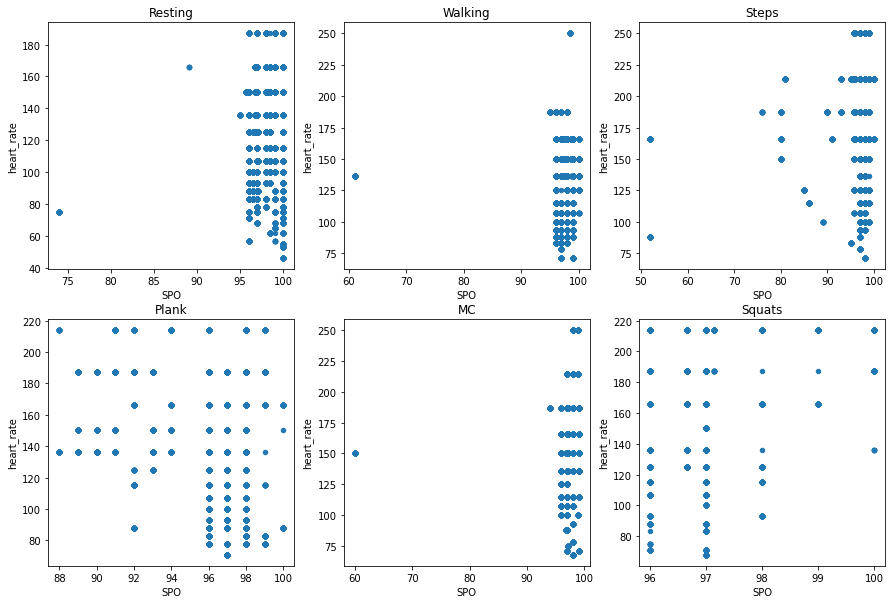

In [14]:
sub_plots(data_set_v_0, data_set_v_1, data_set_v_2, data_set_v_3, data_set_v_4, data_set_v_5)

NEW APPROACH:
Taking only vitals data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

In [3]:
def sub_plots(data_0, data_1, data_2, data_3, data_4, data_5):

  fig, axes = plt.subplots(nrows=2, ncols=3)

  data_0.plot(x ='SPO', y='heart_rate', kind = 'scatter', ax=axes[0,0],  title='Resting', figsize=(15,10))
  data_1.plot(x ='SPO', y='heart_rate', kind = 'scatter', ax=axes[0,1], title='Walking')
  data_2.plot(x ='SPO', y='heart_rate', kind = 'scatter', ax=axes[0,2], title='Steps')
  data_3.plot(x ='SPO', y='heart_rate', kind = 'scatter', ax=axes[1,0], title='Plank')
  data_4.plot(x ='SPO', y='heart_rate', kind = 'scatter', ax=axes[1,1],  title='MC')
  data_5.plot(x ='SPO', y='heart_rate', kind = 'scatter', ax=axes[1,2], title='Squats')
  plt.show()

In [4]:
def remove_outliers(data, sd):
    spo_mean, spo_std = data.SPO.mean(), data.SPO.std()
    hr_mean, hr_std = data.heart_rate.mean(), data.heart_rate.std()
    
    spo_cut_off = spo_std * sd
    hr_cut_off = hr_std * sd
    
    spo_lower, spo_upper = spo_mean - spo_cut_off, spo_mean + spo_cut_off
    hr_lower, hr_upper = hr_mean - hr_cut_off, hr_mean + hr_cut_off
    
    data = data.loc[(data['SPO'] > spo_lower) & (data['SPO'] < spo_upper) ].reset_index(drop=True)
    data = data.loc[(data['heart_rate'] > hr_lower) & (data['heart_rate'] < hr_upper) ].reset_index(drop=True)
    
    return data

In [5]:
def get_vital_datasets(path_v):

    path = os.getcwd()
    v_files = os.path.join(path,path_v)

    paths, dirs, files_v = next(os.walk(v_files))
    file_v_count = len(files_v)

    df_v_list = []

    for i in range(file_v_count):
        temp_df = pd.read_csv(os.path.join(path_v,files_v[i]),sep = ';')
        df_v_list.append(temp_df)
        
    return df_v_list

In [6]:
# Concat all csv files for the same exercise
def concat_datsets(df_v_list_new):
    data_set_v = []

    for i in range(len(df_v_list_new)):
        data_set_v.append(df_v_list_new[i])

    data_set_v = pd.concat(data_set_v, axis=0)
    
    #data_set_v[['person_id', 'exercise']] = data_set_v[['person_id', 'exercise']].astype(int)
    return data_set_v

In [7]:
def reduce_datset_avg(n,data1):
    
    for i in range(len(data1)):
        data1[i].loc[data1[i]['SPO'] < 0, 'SPO'] = data1[i].loc[data1[i]['SPO'] > 0, 'SPO'].mean()
        data1[i] = data1[i].groupby(np.arange(len(data1[i]))// (len(data1[i])/n)).mean()
        data1[i][['person_id', 'exercise']] = data1[i][['person_id', 'exercise']].astype(int) 
            
    return data1

In [8]:
def reduce_dataset_v(n,df_v_list):
    df_v_list_new= df_v_list.copy()
    df_v_list_new = df_v_list_new.groupby(np.arange(len(df_v_list_new))// (len(df_v_list_new)/n)).mean()
    return df_v_list_new

In [9]:
def get_head_dataset(n, df_v_list):
    df_v_list_new= df_v_list.copy()
   
    for i in range(len(df_v_list_new)):
        df_v_list_new[i].loc[df_v_list_new[i]['SPO'] < 0, 'SPO'] = df_v_list_new[i].loc[df_v_list_new[i]['SPO'] > 0, 'SPO'].mean()
        df_v_list_new[i] = df_v_list_new[i].head(n)

    return df_v_list_new

In [10]:
n=1000
path_v_0 = '0-Baseline/vitals'

df_v_list_0 = get_vital_datasets(path_v_0)
df_v_list_new_0 = reduce_datset_avg(n,df_v_list_0)
data_set_v_0 = concat_datsets(df_v_list_new_0)

path_v_1 = '1-Walking/vitals'
path_a_1 = '1-Walking/acc'

df_v_list_1 = get_vital_datasets(path_v_1)
df_v_list_new_1 = reduce_datset_avg(n, df_v_list_1)
data_set_v_1 = concat_datsets(df_v_list_new_1)

path_v_2 = '2-Steps/vitals'
path_a_2 = '2-Steps/acc'

df_v_list_2 = get_vital_datasets(path_v_2)
df_v_list_new_2 = reduce_datset_avg(n, df_v_list_2)
data_set_v_2 = concat_datsets(df_v_list_new_2)

path_v_3 = '3-Plank/vitals'
path_a_3 = '3-Plank/acc'

df_v_list_3 = get_vital_datasets(path_v_3)
df_v_list_new_3 = reduce_datset_avg(n, df_v_list_3)
data_set_v_3 = concat_datsets(df_v_list_new_3)

path_v_4 = '4-MC/vitals'
path_a_4 = '4-MC/acc'

df_v_list_4 = get_vital_datasets(path_v_4)
df_v_list_new_4 = reduce_datset_avg(n, df_v_list_4)
data_set_v_4 = concat_datsets(df_v_list_new_4)

path_v_5 = '5-Squats/vitals'
path_a_5 = '5-Squats/acc'

df_v_list_5 = get_vital_datasets(path_v_5)
df_v_list_new_5 = reduce_datset_avg(n, df_v_list_5)
data_set_v_5 = concat_datsets(df_v_list_new_5)

In [11]:
print("Resting datapoints: ", len(data_set_v_0))
print("Walking datapoints: ", len(data_set_v_1))
print("Steps datapoints: ", len(data_set_v_2))
print("Plank datapoints: ", len(data_set_v_3))
print("MC datapoints: ", len(data_set_v_4))
print("Squats datapoints: ", len(data_set_v_5))

Resting datapoints:  15000
Walking datapoints:  8000
Steps datapoints:  9000
Plank datapoints:  8000
MC datapoints:  7000
Squats datapoints:  4000


In [12]:
#balance datasets
m=4000
bal_set_v_0 = reduce_dataset_v(m, data_set_v_0)
bal_set_v_1 = reduce_dataset_v(m, data_set_v_1)
bal_set_v_2 = reduce_dataset_v(m, data_set_v_2)
bal_set_v_3 = reduce_dataset_v(m, data_set_v_3)
bal_set_v_4 = reduce_dataset_v(m, data_set_v_4)
bal_set_v_5 = reduce_dataset_v(m, data_set_v_5)

In [13]:
print("Resting datapoints: ", len(bal_set_v_0))
print("Walking datapoints: ", len(bal_set_v_1))
print("Steps datapoints: ", len(bal_set_v_2))
print("Plank datapoints: ", len(bal_set_v_3))
print("MC datapoints: ", len(bal_set_v_4))
print("Squats datapoints: ", len(bal_set_v_5))

Resting datapoints:  4000
Walking datapoints:  4000
Steps datapoints:  4000
Plank datapoints:  4000
MC datapoints:  4000
Squats datapoints:  4000


In [14]:
sd=1
or_bal_set_v_0= remove_outliers(bal_set_v_0,sd)
or_bal_set_v_1= remove_outliers(bal_set_v_1,sd)
or_bal_set_v_2= remove_outliers(bal_set_v_2,sd)
or_bal_set_v_3= remove_outliers(bal_set_v_3,sd)
or_bal_set_v_4= remove_outliers(bal_set_v_4,sd)
or_bal_set_v_5= remove_outliers(bal_set_v_5,sd)

In [15]:
# Join everything in a single dataset
data_set_group18= []
data_set_group18 = or_bal_set_v_0.append([or_bal_set_v_1, or_bal_set_v_2, or_bal_set_v_3,or_bal_set_v_4, or_bal_set_v_5]).reset_index(drop=True)
data_set_group18

/tmp/ipykernel_23732/1775273521.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_set_group18 = or_bal_set_v_0.append([or_bal_set_v_1, or_bal_set_v_2, or_bal_set_v_3,or_bal_set_v_4, or_bal_set_v_5]).reset_index(drop=True)


,person_id,exercise,spo_base,heart_rate_base,SPO,heart_rate
0,3.0,0.0,98.0,113.0,97.000000,128.1
1,3.0,0.0,98.0,113.0,97.000000,115.0
2,3.0,0.0,98.0,113.0,97.000000,107.8
3,3.0,0.0,98.0,113.0,97.000000,142.4
4,3.0,0.0,98.0,113.0,97.000000,150.0
...,...,...,...,...,...,...
13796,5.0,5.0,99.0,77.0,96.533456,115.0
13797,5.0,5.0,99.0,77.0,96.533456,115.0
13798,5.0,5.0,99.0,77.0,96.533456,115.0
13799,5.0,5.0,99.0,77.0,96.533456,115.0


In [20]:
data_set_group18.to_csv('vital_set_group18.csv', sep=',')

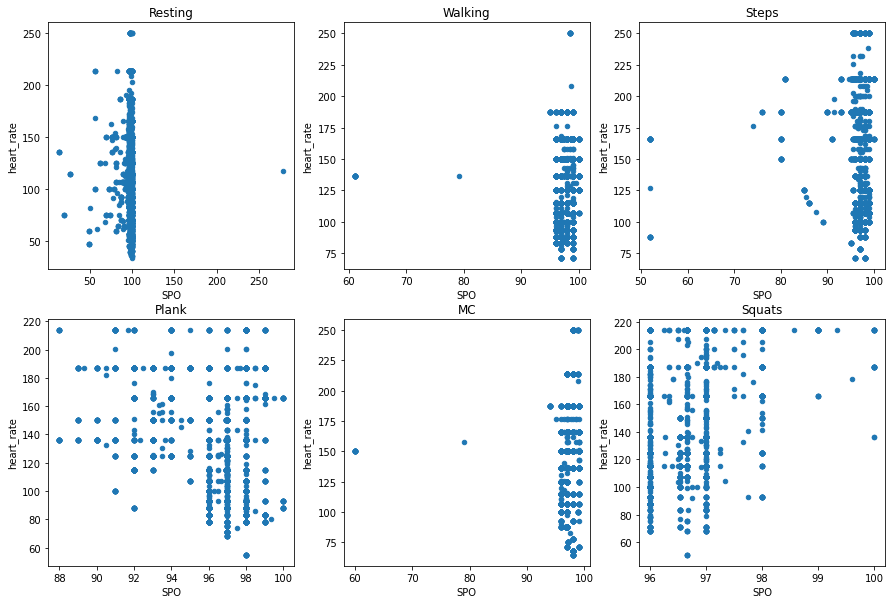

In [17]:
sub_plots(data_set_v_0, data_set_v_1, data_set_v_2,data_set_v_3, data_set_v_4, data_set_v_5)

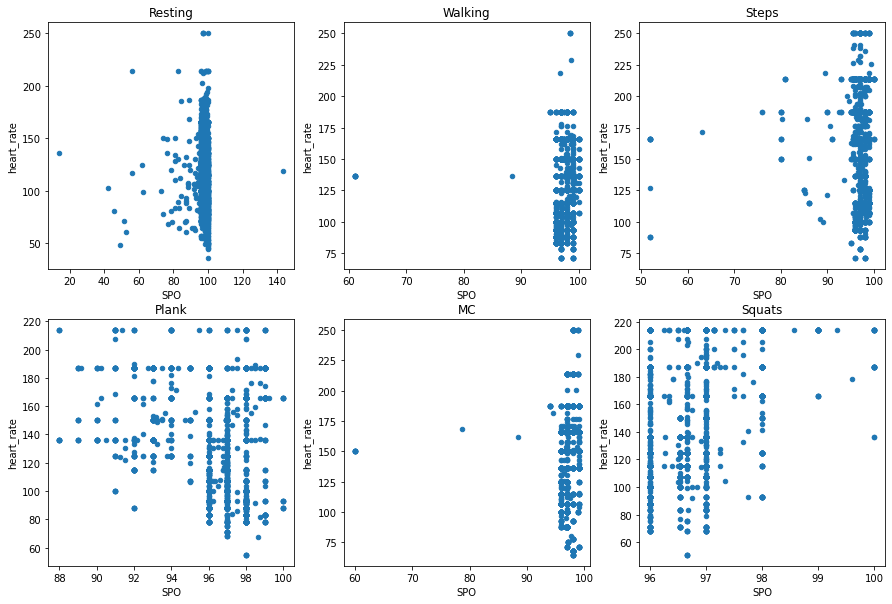

In [18]:
sub_plots(bal_set_v_0, bal_set_v_1, bal_set_v_2,bal_set_v_3, bal_set_v_4, bal_set_v_5)

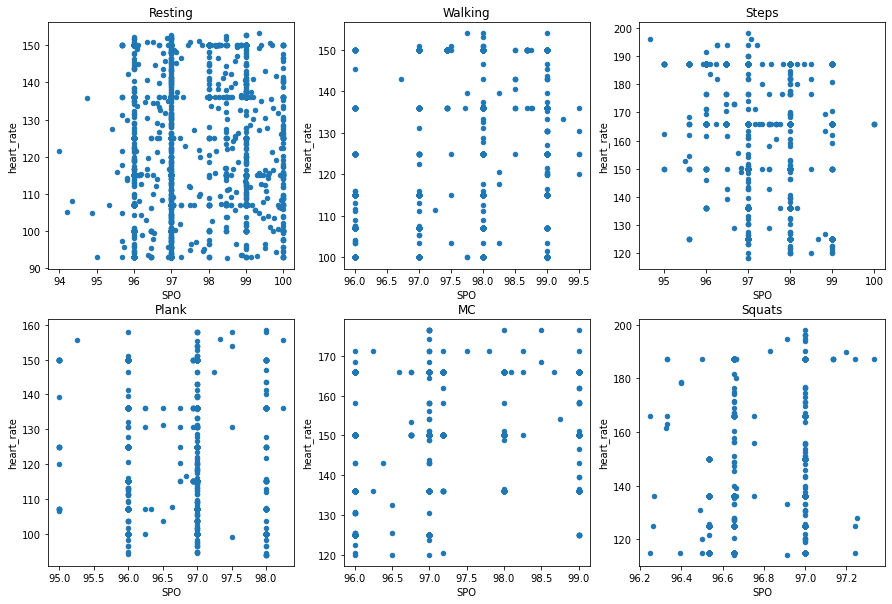

In [19]:
sub_plots(or_bal_set_v_0, or_bal_set_v_1, or_bal_set_v_2,or_bal_set_v_3, or_bal_set_v_4, or_bal_set_v_5)